# FORECASTING SYSTEM- PROJECT DEMAND OF PRODUCTS AT A RETAIL OUTLET BASED ON HISTORICAL DATA

**Name-** Tanmay Sunil Dixit


**B. K. Birla College Kalyan west**


**Branch** - Data science

# Loading Libraries

In [1]:
#LOADING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
warnings.filterwarnings("ignore")

In [56]:
data = pd.read_csv("https://raw.githubusercontent.com/tanmaydspract/Forecasting-System---Project-Demand-of-Products-at-a-Retail-Outlet-Based-on-Historical-Data/main/trainforecastingdata.csv")
data.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
data.shape

(913000, 4)

In [4]:
data.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

**Null values are absent**

# PRODUCTS AND THEIR SALES

In [5]:
items=pd.DataFrame(data.groupby(['item'])['sales'].sum())
items

,sales
item,
1,401384
2,1069564
3,669087
4,401907
5,335230
6,1068281
7,1068777
8,1405108
9,938379


**WE HAVE 50 DIFFERENT PRODUCT CATEGORIES**

# STORES WISE SALES

In [6]:
stores=pd.DataFrame(data.groupby(['store'])['sales'].sum())
stores

,sales
store,
1,4315603
2,6120128
3,5435144
4,5012639
5,3631016
6,3627670
7,3320009
8,5856169
9,5025976


**WE HAVE 10 DIFFERENT CATEGORIES OF STORES**

# EXPLORATORY DATA ANALYSIS ON DATA

# Bivariate 

**PRODUCT WISE SALES BARPLOT**

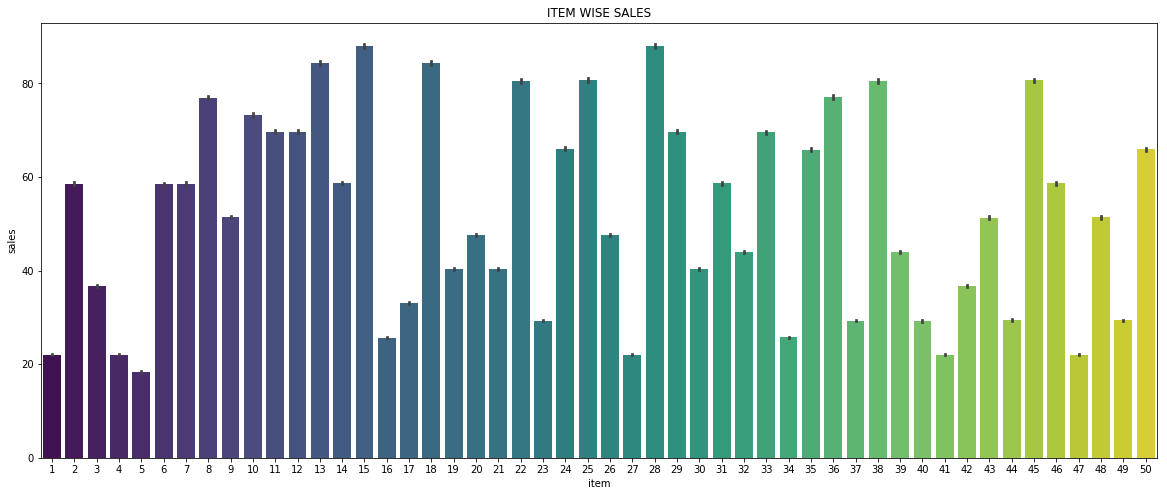

In [7]:
plt.figure(figsize=(20,8))
'''
plt.subplot(1,2,1)
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.item, y=data.sales, palette=("magma"))

plt.subplot(1,2,2)
'''
plt.title('ITEM WISE SALES')
sns.barplot(x=data.item, y=data.sales, palette=("viridis"))

plt.show()

**PRODUCT WISE SALES BOXPLOT**

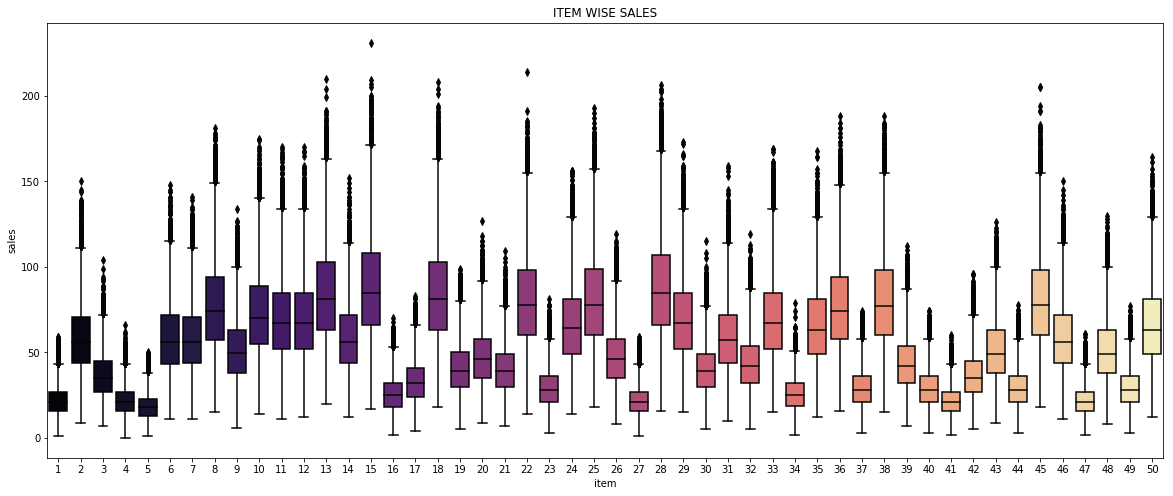

In [8]:
plt.figure(figsize=(20,8))
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.item, y=data.sales, palette=("magma"))
plt.show()

**STORE WISE BARPLOT**

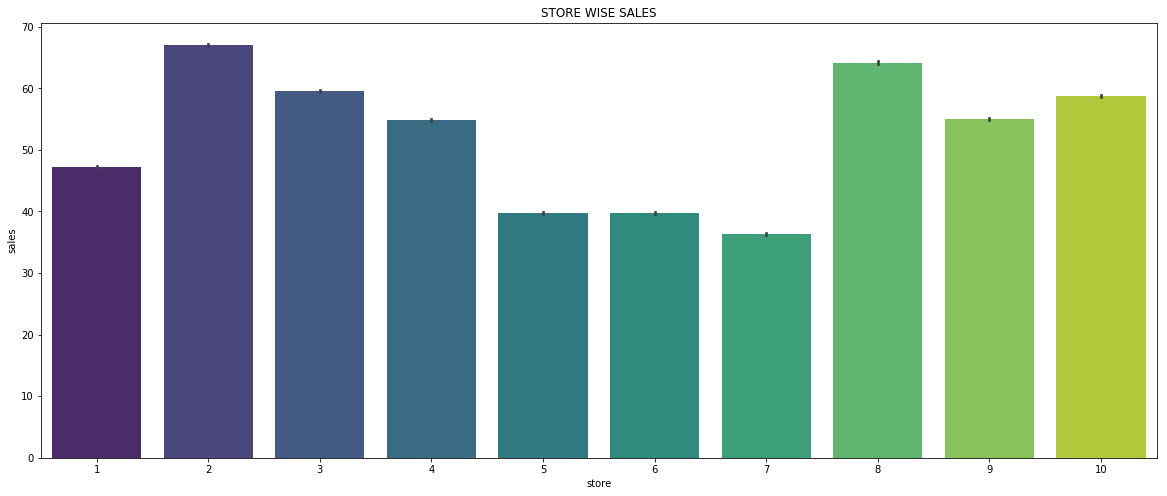

In [9]:
plt.figure(figsize=(20,8))
plt.title('STORE WISE SALES')
sns.barplot(x=data.store, y=data.sales, palette=("viridis"))
plt.show()

**STORE WISE BOXPLOT**

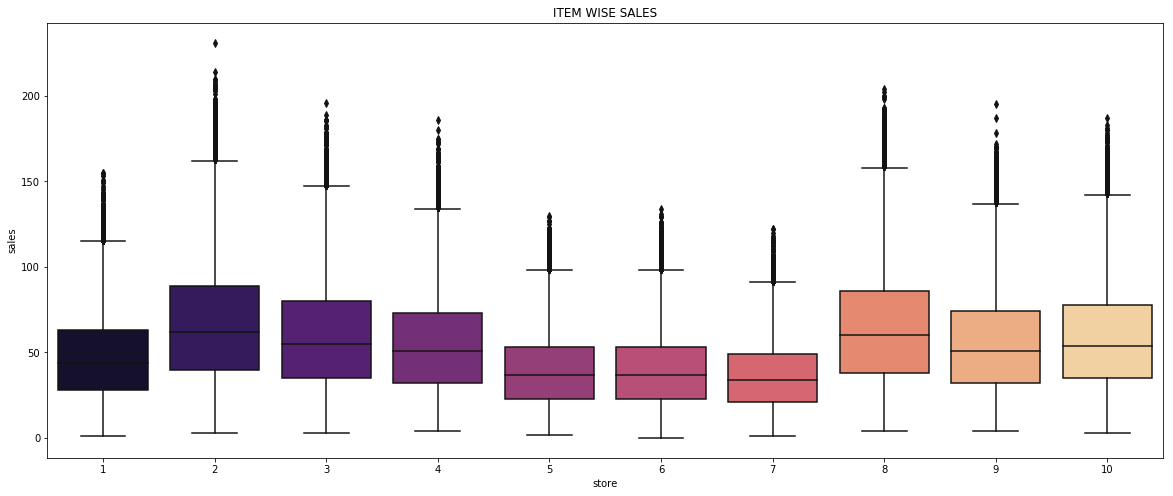

In [10]:
plt.figure(figsize=(20,8))
plt.title('ITEM WISE SALES')
sns.boxplot(x=data.store, y=data.sales, palette=("magma"))
plt.show()

# Preparing data for time series analysis

In [11]:
df=data[['date','sales']]

In [12]:
print(type(df.loc[101]['date']))
df['date']=pd.to_datetime(df.date)
print(type(df.loc[101]['date']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [13]:
df.head()

,date,sales
0,2013-01-01,13
1,2013-01-02,11
2,2013-01-03,14
3,2013-01-04,13
4,2013-01-05,10


In [14]:
df.set_index('date', inplace=True)

# RESAMPLING DATA

In [15]:
df.head()

,sales
date,
2013-01-01,13
2013-01-02,11
2013-01-03,14
2013-01-04,13
2013-01-05,10


In [16]:
df=df.resample('M').sum()
df.head(13)

,sales
date,
2013-01-31,454904
2013-02-28,459417
2013-03-31,617382
2013-04-30,682274
2013-05-31,763242
2013-06-30,795597
2013-07-31,855922
2013-08-31,766761
2013-09-30,689907


# UNIVARIATE ANALYSIS ON SALES

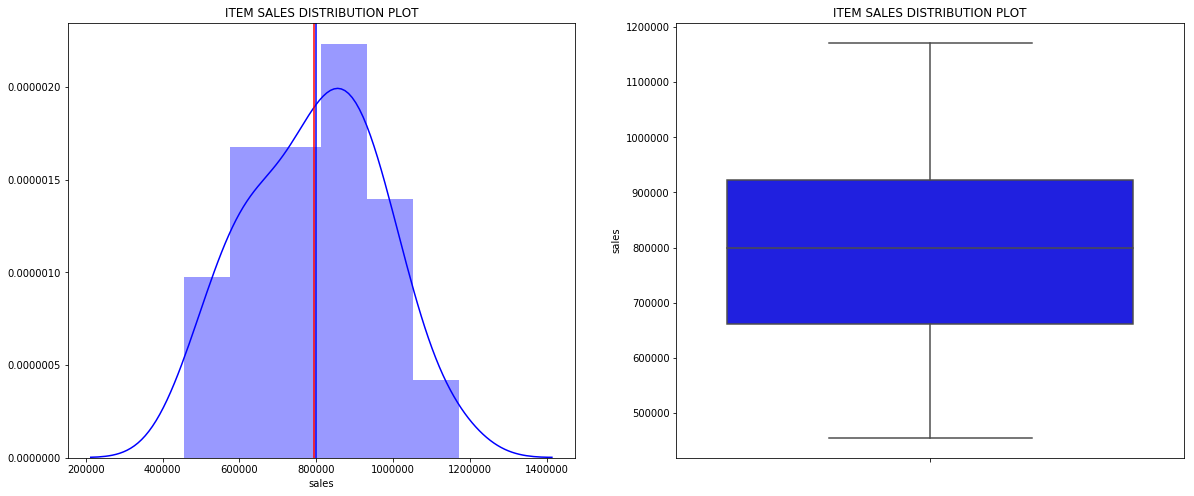

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('ITEM SALES DISTRIBUTION PLOT')
sns.distplot(df.sales, color='b')
plt.axvline(df.sales.mean(), color="r")
plt.axvline(df.sales.median(), color="b")

plt.subplot(1,2,2)
plt.title('ITEM SALES DISTRIBUTION PLOT')
sns.boxplot(y=df.sales, color='b')

plt.show()

In [18]:
df.sales.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count    6.000000e+01
mean     7.950752e+05
std      1.729018e+05
min      4.549040e+05
25%      6.617050e+05
50%      7.990180e+05
75%      9.220262e+05
85%      9.825794e+05
90%      1.020884e+06
100%     1.171393e+06
max      1.171393e+06
Name: sales, dtype: float64

In [19]:
print('DIFFERNCE BETWEEN MEAN AND MEDIAN :',df.sales.mean()-df.sales.median())

DIFFERNCE BETWEEN MEAN AND MEDIAN : -3942.8000000000466


1. The plot seemed to be normally distributed, meaning that the most charges in the dataset are towards mean(Below ,990).
2. There is a significant difference between the mean and the median of the chares distribution.
3. The median is not spread out from the mean.

# CHECKING DATA STATIONARY OR NOT

In [20]:
from statsmodels.tsa.stattools import adfuller

In [21]:
def stest(s):
    r=adfuller(s)
    l=['ADF test','p-value','#lags used','no. of observations used']
    for v,la in zip(r,l):
        print(la,'->',str(v))
    print()
    if r[1]<=0.05:
        print('data is stationary')
    else:
        print('data is not stationary')

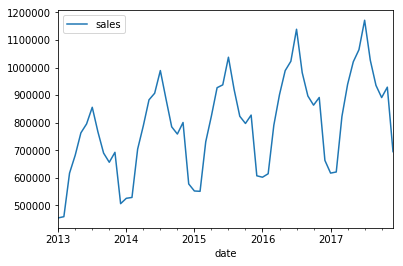

In [22]:
df.plot()

In [23]:
stest(df['sales'])

ADF test -> -5.247518850016355
p-value -> 7.026495391574649e-06
#lags used -> 11
no. of observations used -> 48

data is stationary


# AUTO CORELATION

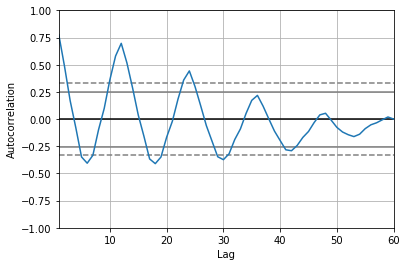

In [24]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['sales'])
plt.show()

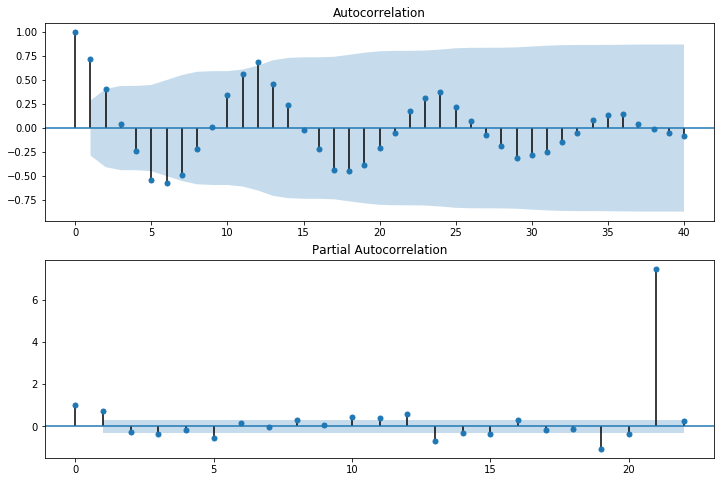

In [37]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['sales'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['sales'].iloc[13:],lags=22,ax=ax2)

# SARIMAX MODEL IMPLEMENTATION

In [38]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [39]:
ts2=sm.tsa.statespace.SARIMAX(df.sales,order=(1,1,1),seasonal_order=(1,1,1,12), enforce_invertibility=False, enforce_stationarity=False)
model2=ts2.fit()

C:\Users\Tanmay Dixit\Anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [55]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              sales   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -548.629
Date:                            Mon, 14 Nov 2022   AIC                           1107.259
Time:                                    22:55:08   BIC                           1114.741
Sample:                                01-31-2013   HQIC                          1109.776
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0119   2.03e-24  -4.99e+23      0.000      -1.012      -1.012
ma.L1          0.8282   3.09e-24   2.68e+23      0.000       0.828       0.828
ar.S.L12      -0.1358   2.08e-25  -6.52e+23      0.000      -0.136      -0.136
ma.S.L12   -1.024e+14   6.12e-33  -1.67e+46      0.000   -1.02e+14   -1.02e+14
sigma2       4.18e-15    3.3e-10   1.27e-05      1.000   -6.47e-10    6.47e-10
===================================================================================
Ljung-Box (Q):                       50.14   Jarque-Bera (JB):                 3.22
Prob(Q):                              0.02   Prob(JB):                         0.20
Heteroskedasticity (H):               0.64   Skew:                            -0.69
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.96e+61. Standard errors may be unstable.
"""

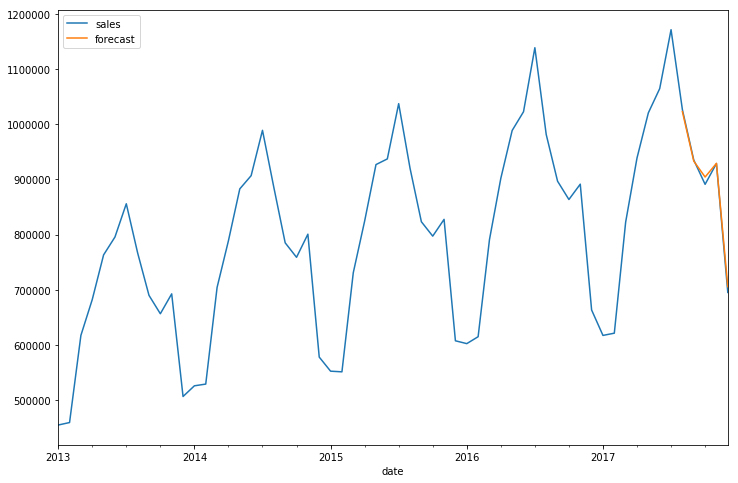

In [40]:
df['forecast']=model2.predict(start=55,end=75,dynamic=True)
df[['sales','forecast']].plot(figsize=(12,8))

# FUTURE FORECAST

In [41]:
from pandas.tseries.offsets import DateOffset
futuredates=[df.index[-1]+DateOffset(months=x)for x in range(0,24)]

In [42]:
futuredatedf=pd.DataFrame(index=futuredates[1:], columns=df.columns)

In [43]:
futuredatedf.tail()

,sales,forecast
2019-07-31,NaN,NaN
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN
2019-11-30,NaN,NaN


In [44]:
future=pd.concat([df,futuredatedf])

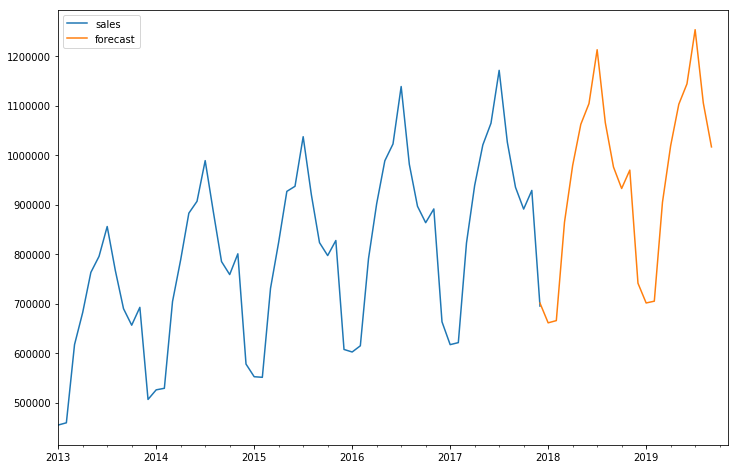

In [45]:
future['forecast']=model2.predict(start=59,end=80,dynamic=True)
future[['sales','forecast']].plot(figsize=(12,8))

# TESTING OUR MODEL ON OTHER DATASET

# Prediction of Air Passengers Time Series Analysis

In [26]:
df2 = pd.read_csv("C://Users//Tanmay Dixit//Downloads//AirPassengers.csv")
df2.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [28]:
df2.columns=['month','passengers']
print(type(df2.loc[101]['month']))
df2['month']=pd.to_datetime(df2.month)
print(type(df2.loc[101]['month']))

<class 'str'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


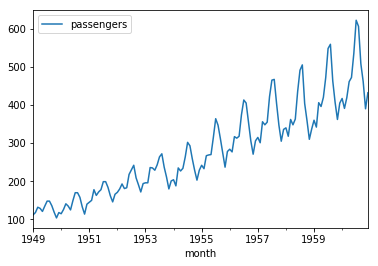

In [30]:
df2.set_index('month', inplace=True)
df2.plot()

In [31]:
stest(df2['passengers'])

ADF test -> 0.8153688792060423
p-value -> 0.9918802434376409
#lags used -> 13
no. of observations used -> 130

data is not stationary


In [32]:
df2['passengersfirstdifference']=df2.passengers-df2.passengers.shift(1)
df2['seasonaldifference']=df2.passengers-df2.passengers.shift(12)

In [34]:
stest(df2.seasonaldifference.dropna())

ADF test -> -3.3830207264924805
p-value -> 0.011551493085514982
#lags used -> 1
no. of observations used -> 130

data is stationary


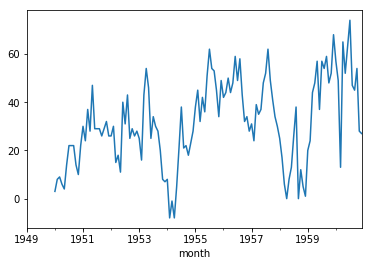

In [35]:
df2.seasonaldifference.plot()

# TESTING OUR MODEL TO PREDICT AIR PASSENGERS

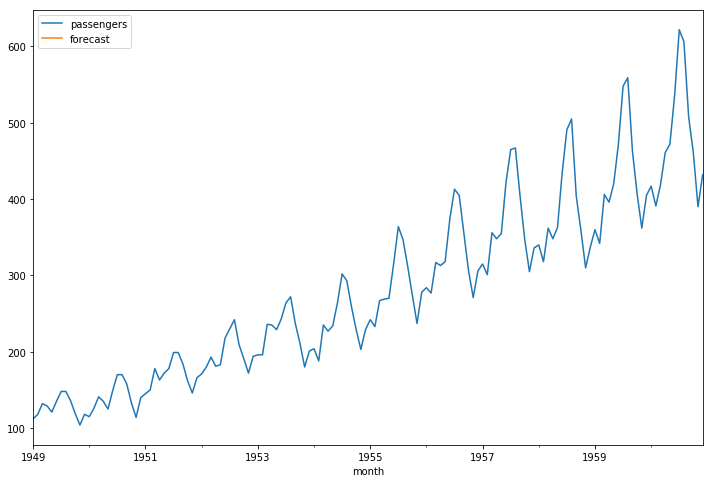

In [46]:
df2['forecast']=model2.predict(start=90,end=103,dynamic=True)
df2[['passengers','forecast']].plot(figsize=(12,8))

# FUTURE FORECASTING OF AIR PASSENGER

In [50]:
from pandas.tseries.offsets import DateOffset
futuredates2=[df2.index[-1]+DateOffset(months=x)for x in range(0,24)]
futuredatedf2=pd.DataFrame(index=futuredates2[1:], columns=df2.columns)
future2=pd.concat([df2,futuredatedf2])

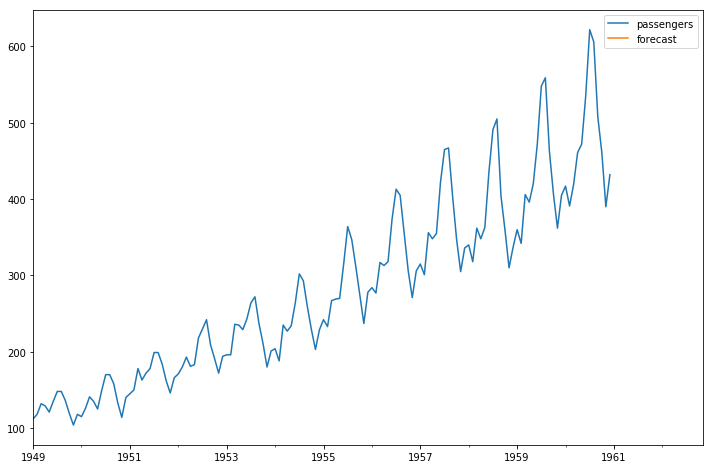

In [54]:
future2['forecast']=model2.predict(start=104,end=200,dynamic=True)
future2[['passengers','forecast']].plot(figsize=(12,8))

***AS WE CAN SEE THE DATA OF 1961 WE CAN SAY THAT MODEL IS SUCESSFULL***

# CONCLUSION

***Sarima model sucessfully predicting the sales of given data***

***On the basis of future forecasting we get to know ***

***The predictive performance of the autoregressive model can be assessed as soon as estimation has been done if cross-validation is used. In this approach, some of the initially available data was used for parameter estimation purposes, and some (from available observations later in the data set) was held back for out-of-sample testing. Alternatively, after some time has passed after the parameter estimation was conducted, more data will have become available and predictive performance can be evaluated then using the new data.***